In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

**Loading the datasets on:**
1. Order Details
2. Orders
3. Pizza Types
4. Pizzas

In [2]:
df1 = pd.read_csv("/kaggle/input/pizza-place-sales/order_details.csv")
df2 = pd.read_csv("/kaggle/input/pizza-place-sales/orders.csv")
df3 = pd.read_csv("/kaggle/input/pizza-place-sales/pizza_types.csv",encoding='unicode_escape')
df4 = pd.read_csv("/kaggle/input/pizza-place-sales/pizzas.csv")

**Displaying the first 5 rows of each dataset**

In [3]:
df1.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [4]:
df2.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [5]:
df3.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [6]:
df4.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


**Basic information about each dataset**

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [10]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


There are no missing values found in the datasets.

**Statistical description of relevant datasets**

In [11]:
df1.describe()

,order_details_id,order_id,quantity
count,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622
std,14035.529381,6180.119770,0.143077
min,1.000000,1.000000,1.000000
25%,12155.750000,5337.000000,1.000000
50%,24310.500000,10682.500000,1.000000
75%,36465.250000,16100.000000,1.000000
max,48620.000000,21350.000000,4.000000


In [12]:
df4.describe()

,price
count,96.000000
mean,16.440625
std,4.090266
min,9.750000
25%,12.500000
50%,16.250000
75%,20.250000
max,35.950000


**Changing datatype in df2 dataset**

In [13]:
df2['date'] = pd.to_datetime(df2['date'], errors='coerce', format='%Y-%m-%d')
df2['time'] = pd.to_datetime(df2['time'], format='%H:%M:%S')

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  datetime64[ns]
 2   time      21350 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 500.5 KB


**Combining df1 and df2 ie. Order_Details and Orders**

In [14]:
combined1 = pd.merge(df1, df2, how='inner', on='order_id')
combined1

,order_details_id,order_id,pizza_id,quantity,date,time
0,1,1,hawaiian_m,1,2015-01-01,1900-01-01 11:38:36
1,2,2,classic_dlx_m,1,2015-01-01,1900-01-01 11:57:40
2,3,2,five_cheese_l,1,2015-01-01,1900-01-01 11:57:40
3,4,2,ital_supr_l,1,2015-01-01,1900-01-01 11:57:40
4,5,2,mexicana_m,1,2015-01-01,1900-01-01 11:57:40
...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,1900-01-01 21:23:10
48616,48617,21348,four_cheese_l,1,2015-12-31,1900-01-01 21:23:10
48617,48618,21348,napolitana_s,1,2015-12-31,1900-01-01 21:23:10
48618,48619,21349,mexicana_l,1,2015-12-31,1900-01-01 22:09:54


**Combining df3 and df4 ie. Pizza_Types and Pizzas**

In [15]:
combined2 = pd.merge(df3, df4, how='inner', on='pizza_type_id')
combined2

,pizza_type_id,name,category,ingredients,pizza_id,size,price
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75
1,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_m,M,16.75
2,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_l,L,20.75
3,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",cali_ckn_s,S,12.75
4,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",cali_ckn_m,M,16.75
...,...,...,...,...,...,...,...
91,spinach_fet,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G...",spinach_fet_m,M,16.00
92,spinach_fet,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G...",spinach_fet_l,L,20.25
93,veggie_veg,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",veggie_veg_s,S,12.00
94,veggie_veg,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",veggie_veg_m,M,16.00


**Combining df1 and df4 ie. Order_Details and Pizzas**

In [16]:
combined3= pd.merge(df1, df4, how='inner', on='pizza_id')
combined3

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price
0,1,1,hawaiian_m,1,hawaiian,M,13.25
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00
2,3,2,five_cheese_l,1,five_cheese,L,18.50
3,4,2,ital_supr_l,1,ital_supr,L,20.75
4,5,2,mexicana_m,1,mexicana,M,16.00
...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,ckn_alfredo,M,16.75
48616,48617,21348,four_cheese_l,1,four_cheese,L,17.95
48617,48618,21348,napolitana_s,1,napolitana,S,12.00
48618,48619,21349,mexicana_l,1,mexicana,L,20.25


In [17]:
combined3.set_index(['order_details_id'])

,order_id,pizza_id,quantity,pizza_type_id,size,price
order_details_id,,,,,,
1,1,hawaiian_m,1,hawaiian,M,13.25
2,2,classic_dlx_m,1,classic_dlx,M,16.00
3,2,five_cheese_l,1,five_cheese,L,18.50
4,2,ital_supr_l,1,ital_supr,L,20.75
5,2,mexicana_m,1,mexicana,M,16.00
...,...,...,...,...,...,...
48616,21348,ckn_alfredo_m,1,ckn_alfredo,M,16.75
48617,21348,four_cheese_l,1,four_cheese,L,17.95
48618,21348,napolitana_s,1,napolitana,S,12.00


In [18]:
combined3['size'].value_counts()

size
L      18526
M      15385
S      14137
XL       544
XXL       28
Name: count, dtype: int64

##### sales= combined3.groupby(['pizza_id'])['price'].sum().sort_values(ascending = False)
sales

# 1.How many customers do we have each day? Are there any peak hours?

In [19]:
sales_date = df2['date'].value_counts()
sales_date

date
2015-11-27    115
2015-11-26    113
2015-10-15    107
2015-07-04    105
2015-05-15     94
             ... 
2015-03-22     37
2015-02-22     37
2015-12-27     35
2015-12-30     32
2015-12-29     27
Name: count, Length: 358, dtype: int64

In [20]:
sales_avg = df2['date'].value_counts().mean()
sales_avg

59.63687150837989

In [21]:
df2['hour'] = df2['time'].dt.hour
df2

,order_id,date,time,hour
0,1,2015-01-01,1900-01-01 11:38:36,11
1,2,2015-01-01,1900-01-01 11:57:40,11
2,3,2015-01-01,1900-01-01 12:12:28,12
3,4,2015-01-01,1900-01-01 12:16:31,12
4,5,2015-01-01,1900-01-01 12:21:30,12
...,...,...,...,...
21345,21346,2015-12-31,1900-01-01 20:51:07,20
21346,21347,2015-12-31,1900-01-01 21:14:37,21
21347,21348,2015-12-31,1900-01-01 21:23:10,21
21348,21349,2015-12-31,1900-01-01 22:09:54,22


In [22]:
sales_hrs = df2['hour'].value_counts().sort_values(ascending=False)
sales_hrs

hour
12    2520
13    2455
18    2399
17    2336
19    2009
16    1920
20    1642
14    1472
15    1468
11    1231
21    1198
22     663
23      28
10       8
9        1
Name: count, dtype: int64

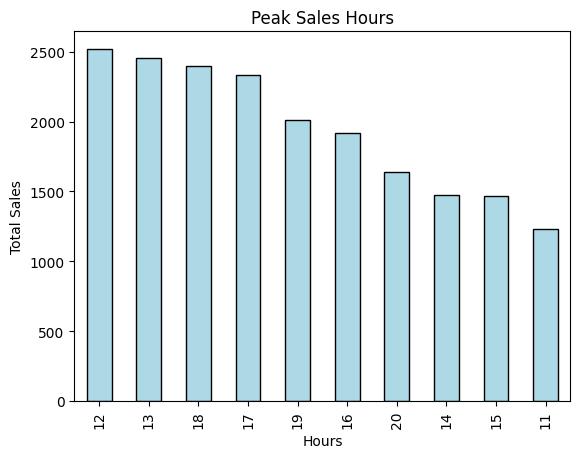

In [24]:
sales_hrs.head(10).plot(kind= "bar", color="lightblue", edgecolor= "black")
plt.title('Peak Sales Hours')
plt.xlabel('Hours')
plt.ylabel('Total Sales')
plt.show()

The peak hours ranged from 1pm-3pm and 6pm-8pm

# 2.How many pizzas are typically in order? Do we have any bestsellers?

In [36]:
avg_order = combined3.groupby('order_id')['pizza_type_id'].nunique().mean()
print(f"The average number of pizzas per order is: {avg_order}")

The average number of pizzas per order is: 2.2162060889929744


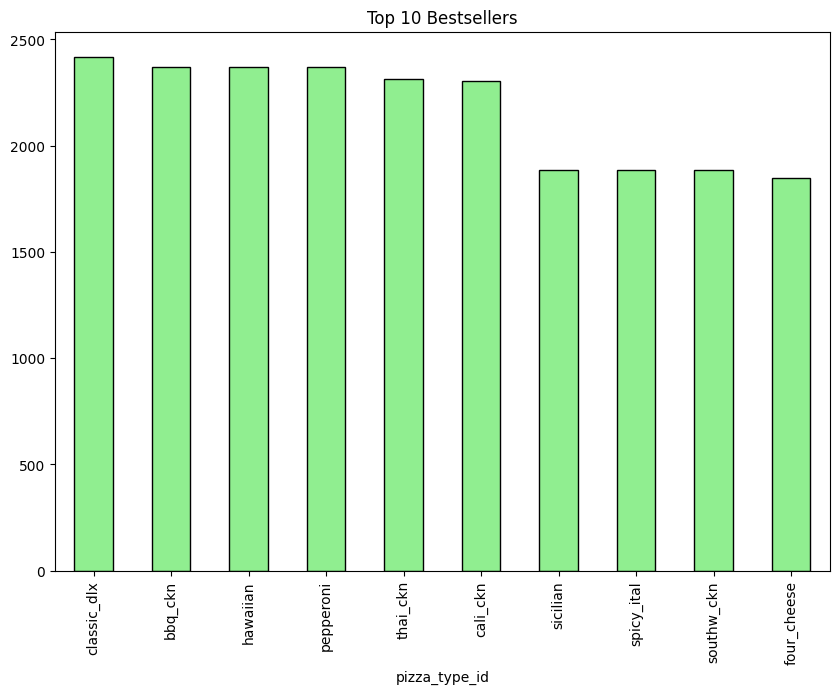

In [39]:
bestsellers = combined3['pizza_type_id'].value_counts().head(10)
plt.figure(figsize=(10,7))
bestsellers.plot(kind='bar', color="lightgreen", edgecolor="black", title='Top 10 Bestsellers')
plt.show()

# 3. How much money did we make this year? Can we identify any seasonality in the sales?

In [41]:
total= combined3['price'].sum()
print(f"The total amount of sales this year is: {total}")

The total amount of sales this year is: 801944.7000000001


In [42]:
df2['date'].value_counts().sort_values(ascending=False)

date
2015-11-27    115
2015-11-26    113
2015-10-15    107
2015-07-04    105
2015-05-15     94
             ... 
2015-03-22     37
2015-02-22     37
2015-12-27     35
2015-12-30     32
2015-12-29     27
Name: count, Length: 358, dtype: int64

In [45]:
df2['Months'] = pd.to_datetime(df2['date'], infer_datetime_format = True).dt.month
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  datetime64[ns]
 2   time      21350 non-null  datetime64[ns]
 3   hour      21350 non-null  int32         
 4   Months    21350 non-null  int32         
dtypes: datetime64[ns](2), int32(2), int64(1)
memory usage: 667.3 KB


/tmp/ipykernel_33/3420735148.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df2['Months'] = pd.to_datetime(df2['date'], infer_datetime_format = True).dt.month


In [46]:
df2['Months'].value_counts().sort_values(ascending=False)

Months
7     1935
5     1853
1     1845
8     1841
3     1840
4     1799
11    1792
6     1773
2     1685
12    1680
9     1661
10    1646
Name: count, dtype: int64

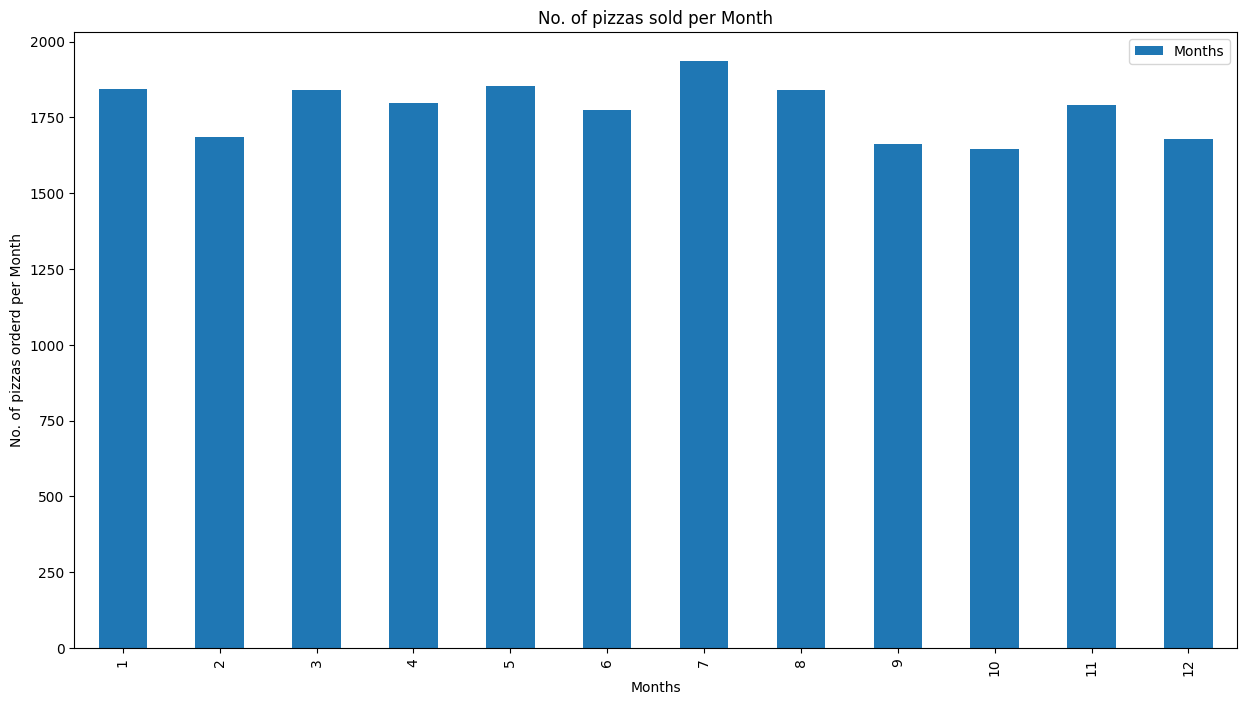

In [48]:
df2.groupby('Months').agg('Months').count().to_frame().plot(kind='bar',figsize=(15,8))
plt.ylabel('No. of pizzas orderd per Month')
plt.title('No. of pizzas sold per Month')
plt.show()

The month July has the highest number of sales

# 4. Are there any pizzas we should take off the menu, or any promotions we could leverage?

In [53]:
top_pizza = combined3['pizza_type_id'].value_counts().head(5)
top_pizza

pizza_type_id
classic_dlx    2416
bbq_ckn        2372
hawaiian       2370
pepperoni      2369
thai_ckn       2315
Name: count, dtype: int64

In [55]:
ok_pizza = combined3['pizza_type_id'].value_counts().tail(5).sort_values(ascending=True)
ok_pizza

pizza_type_id
brie_carre      480
mediterraneo    923
calabrese       927
spinach_supr    940
soppressata     957
Name: count, dtype: int64

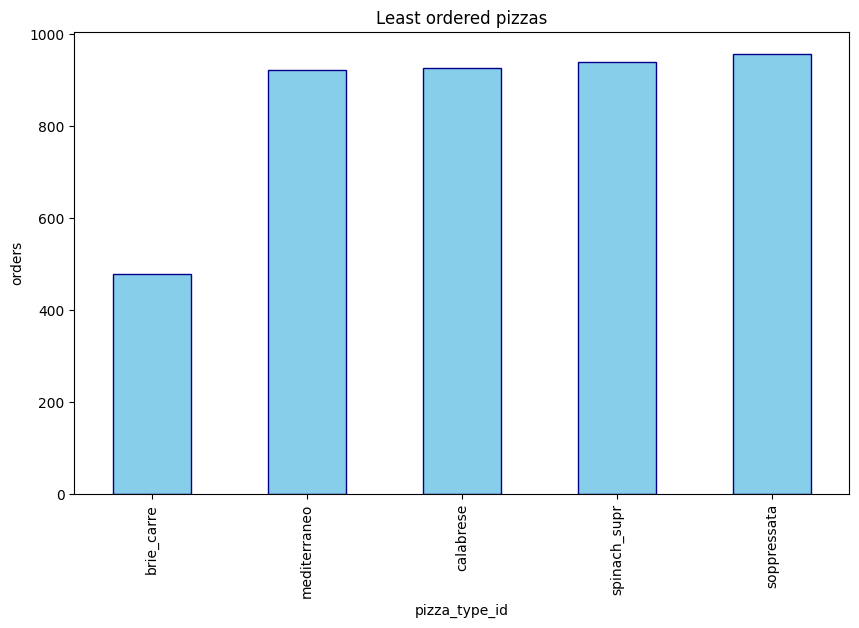

In [60]:
plt.figure(figsize=(10,6))
ok_pizza.plot(kind='bar', title='Least ordered pizzas', color='skyblue', edgecolor='darkblue')
plt.ylabel('orders')
plt.show()

As compared to the top most popular pizza with nearly 2500 orders, the least popular pizza has only 480 orders.

# Conclusion
The analysis of the "Pizza Place Sales" dataset provides insights into a year's worth of sales, including the date and time of each order and the pizzas, served, with additional details on the type, size, quantity, price, and ingredients. After cleaning the data and describing the data briefly, we have done detailed analysis on:

1. How many customers do we have each day? Are there any peak hours?
2. How many pizzas are typically in order? Do we have any bestsellers?
3. How much money did we make this year? Can we identify any seasonality in the sales?
4. Are there any pizzas we should take off the menu, or any promotions we could leverage?